<a href="https://colab.research.google.com/github/RobinTeotia/LinearModels_Project/blob/main/Project_LinearModel_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)


In [ ]:
#Reading the file
path="/content/drive/MyDrive/Linear_Model_Project/auto_clean.csv"
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.describe(include= "all")

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [ ]:
# Looking the columns of the data
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
#number of rows and columns in the data
df.shape


(201, 29)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_do

In [ ]:
df.dropna(inplace=True)
df.shape

(197, 79)

In [ ]:
x = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

print("slope:", reg.coef_[0])
print("intercept", reg.intercept_)

# Algorith Performance
y_pred = reg.predict(x_test)
print("r2: ", metrics.r2_score(y_test,y_pred))
print("mean square error: ", metrics.mean_squared_error(y_test,y_pred))

slope: -719.636820947923
intercept -27357.64290530997
r2:  0.9048956955790506
mean square error:  4106042.321293379


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


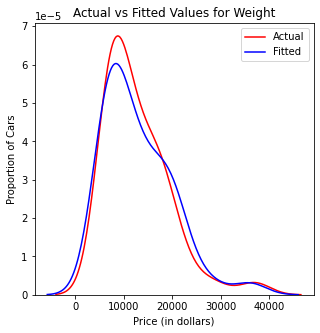

In [ ]:
#Plotting the actual and the predicted values.
width = 5
height = 5
plt.figure(figsize=(width, height))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.gca().legend(("Actual","Fitted"))
plt.title('Actual vs Fitted Values for Weight')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

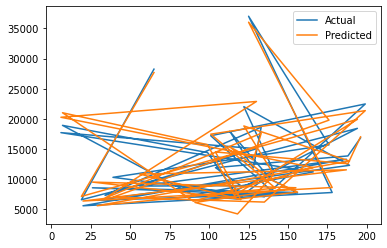

In [ ]:
cdf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
cdf.plot()